In [1]:
import sys
import os
sys.path.append(os.path.abspath("Algorithms/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from XVA import *
from XVAFBSNNs import *

In [3]:
from FBSNNs import *
from ForwardContracts import *

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64 # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 150 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 2 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = ForwardContracts(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [5]:
model.load_model("models/Forward150D.pth")

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 64  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 150 # number of dimensions
Mm = N ** (1/5)

layers = [D+1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
xvamodel = XVA(Xi, T, M, N, D, Mm, layers, mode, activation, model)

n_iter = 15 * 10**2
lr = 1e-3

In [7]:
n_iter = 11 * 10**2
lr = 1e-6

In [13]:
tot = time.time()
print(xvamodel.device)
graph = xvamodel.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 2900, Loss: 1.494e-01, Y0: -0.000, Time: 0.30, Learning Rate: 1.000e-06
It: 3000, Loss: 1.624e-01, Y0: -0.001, Time: 51.99, Learning Rate: 1.000e-06
It: 3100, Loss: 1.543e-01, Y0: -0.001, Time: 30.00, Learning Rate: 1.000e-06
It: 3200, Loss: 1.485e-01, Y0: -0.003, Time: 27.49, Learning Rate: 1.000e-06
It: 3300, Loss: 1.436e-01, Y0: -0.002, Time: 27.35, Learning Rate: 1.000e-06
It: 3400, Loss: 1.510e-01, Y0: -0.003, Time: 32.06, Learning Rate: 1.000e-06
It: 3500, Loss: 1.584e-01, Y0: -0.000, Time: 48.79, Learning Rate: 1.000e-06
It: 3600, Loss: 1.393e-01, Y0: -0.003, Time: 33.66, Learning Rate: 1.000e-06
It: 3700, Loss: 1.378e-01, Y0: -0.001, Time: 27.16, Learning Rate: 1.000e-06
It: 3800, Loss: 1.414e-01, Y0: -0.000, Time: 27.46, Learning Rate: 1.000e-06
It: 3900, Loss: 1.468e-01, Y0: -0.000, Time: 35.69, Learning Rate: 1.000e-06
total time: 388.0889537334442 s


In [8]:
xvamodel.load_model("models/150DForwardFVAXVAPaperFullCol.pth")

In [10]:
t_test, W_test, X_test, C_test = xvamodel.fetch_minibatch()
X_pred, Y_pred = xvamodel.predict(C_test, t_test, W_test, X_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i, X_test_i, C_test_i = xvamodel.fetch_minibatch()
    X_pred_i, Y_pred_i = xvamodel.predict(C_test_i, t_test_i, W_test_i, X_test_i)
    if type(t_test_i).__module__ != 'numpy':
        t_test_i = t_test_i.cpu().numpy()
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    t_test = np.concatenate((t_test, t_test_i), axis=0)
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


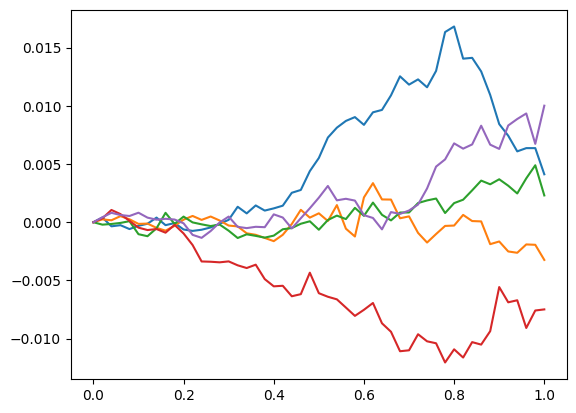

In [11]:
plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, label='Learned $u(t,X_t)$')
plt.plot(t_test[1:5, :, 0].T, Y_pred[1:5, :, 0].T)
plt.show()

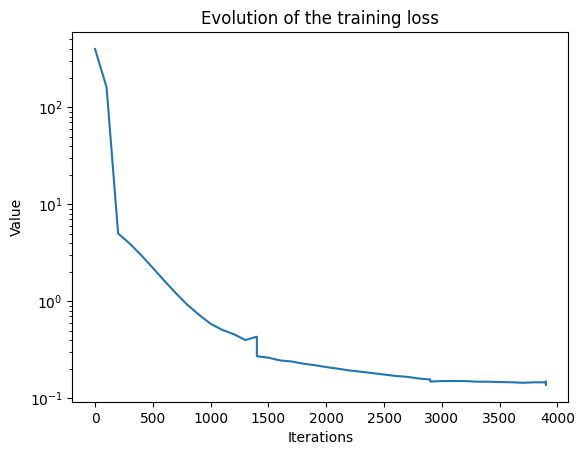

In [12]:
graph = xvamodel.iteration, xvamodel.training_loss
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
plt.show()

In [13]:
Y_pred.shape

(4096, 51, 1)

In [14]:
Y_preds = Y_pred.reshape(4096, 51)

In [15]:
pred_fva = Y_preds[:,0][0] * 100

In [16]:
pred_fva

-1.0710209608078003e-06

In [17]:
xvamodel.save_model("models/150DForwardFVAXVAPaperFullCol.pth")